## Classic metadynamics tutorial... _with plumitas_!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plumitas as plm

### Import PLUMED output files into plm.MetaDProject instance

In [7]:
metad_colvar = 'data/metad/COLVAR'
metad_hills = 'data/metad/HILLS'
metad_plumed = 'data/metad/plumed.dat'

metad = plm.load_project(metad_colvar, metad_hills, 
                         method='metad', bias_type='metad',
                         input_file=metad_plumed)
metad

In [5]:
# check out the colvar file
metad.colvar

,phi,psi,metad.bias
time,,,
0.000000,-2.856238,2.791987,0.000000
1.000000,-1.167845,0.585708,0.000000
2.000000,-2.832865,3.053890,0.000000
3.000000,-1.393824,0.527664,0.960891
4.000000,-2.769396,2.730108,0.769480
5.000000,-2.937667,2.712464,1.757330
6.000000,-2.781530,2.872516,3.048231
7.000000,-1.286944,0.418243,2.070968
8.000000,-1.733048,2.336918,0.011535


In [8]:
# ...and the hills file
metad.hills

,phi,psi,sigma_phi,sigma_psi,height,biasf
time,,,,,,
1.000000,-1.167845,0.585708,0.35,0.35,1.285714,15
2.000000,-2.832865,3.053890,0.35,0.35,1.285714,15
3.000000,-1.393824,0.527664,0.35,0.35,1.250818,15
4.000000,-2.769396,2.730108,0.35,0.35,1.257693,15
5.000000,-2.937667,2.712464,0.35,0.35,1.222614,15
6.000000,-2.781530,2.872516,0.35,0.35,1.178243,15
7.000000,-1.286944,0.418243,0.35,0.35,1.211682,15
8.000000,-1.733048,2.336918,0.35,0.35,1.285290,15
9.000000,-2.390455,2.477458,0.35,0.35,1.234771,15


Nice! From here we can directly track the evolution of bias, and collective variables over the course of our trajectory...

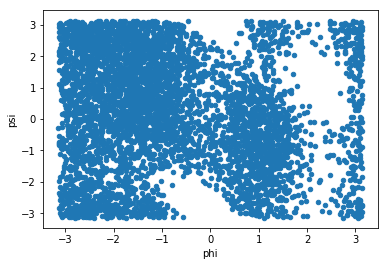

In [17]:
metad.hills.plot(x='phi', y='psi', kind='scatter')

That's all well and good, but we can't get much valuable information out of our system without reweighting. Luckily, we can reconstruct the bias potentials from simulation with plumitas...

In [18]:
metad.reconstruct_bias_potential()

this gives us a dict of bias grids for each biased CV:

In [20]:
metad.static_bias.items()

dict_items([('phi',                 -3.141593     -3.038590     -2.935587     -2.832584  \
time                                                                  
1.000000     1.242801e-07  6.256815e-07  2.888624e-06  1.222967e-05   
2.000000     6.777135e-01  8.413524e-01  9.578463e-01  9.999997e-01   
3.000000     3.847259e-06  1.601703e-05  6.115030e-05  2.140924e-04   
4.000000     5.681150e-01  7.439531e-01  8.933896e-01  9.838353e-01   
5.000000     8.438863e-01  9.592793e-01  9.999823e-01  9.559291e-01   
6.000000     5.890973e-01  7.635986e-01  9.076729e-01  9.894177e-01   
7.000000     7.991740e-07  3.640001e-06  1.520365e-05  5.823449e-05   
8.000000     3.041607e-04  9.520468e-04  2.732748e-03  7.193279e-03   
9.000000     9.996936e-02  1.800342e-01  2.973236e-01  4.502873e-01   
10.000000    7.080442e-07  3.246643e-06  1.365195e-05  5.264307e-05   
11.000001    2.010848e-06  8.693710e-06  3.446809e-05  1.253185e-04   
12.000001    5.223976e-06  2.135766e-05  8.007415e-05  2.

### AND NOWWW WE CAN CALCULATE FRAME WEIGHTS!
... the implementation for MetaD is a little slow. We'll see things speed up for PBMetaD.

In [21]:
metad.weight_frames()

In [22]:
# check out these weights
metad.colvar

,phi,psi,metad.bias,weight
time,,,,
0.000000,-2.856238,2.791987,0.000000,1.667474e-03
1.000000,-1.167845,0.585708,0.000000,2.925283e-04
2.000000,-2.832865,3.053890,0.000000,5.289328e-04
3.000000,-1.393824,0.527664,0.960891,1.256167e-03
4.000000,-2.769396,2.730108,0.769480,2.914175e-03
5.000000,-2.937667,2.712464,1.757330,5.559484e-04
6.000000,-2.781530,2.872516,3.048231,2.447390e-03
7.000000,-1.286944,0.418243,2.070968,5.572818e-04
8.000000,-1.733048,2.336918,0.011535,7.490564e-04


And with that we're ready to reconstruct free energy surfaces and reweight against unbiased CVs

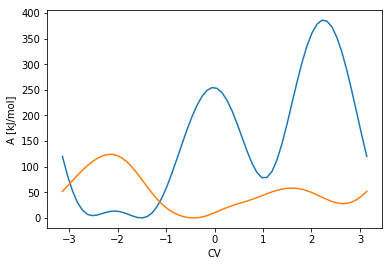

In [23]:
metad.potential_of_mean_force(['phi', 'psi'])

/Users/joshsmith/Git/plumitas_examples/.env/lib/python3.6/site-packages/plumitas/core.py:369: RuntimeWarning: divide by zero encountered in log
  hist = -np.log(hist) / beta


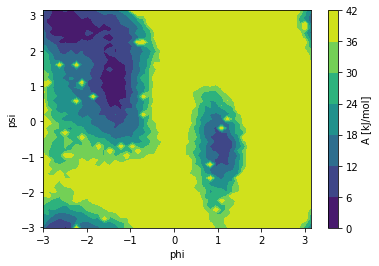

In [27]:
metad.free_energy_surface('phi', 'psi', weight='weight')

# PB MetaD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plumitas as plm

In [4]:
pbmetad_colvar = 'data/pbmetad/COLVAR'
pbmetad_hills = 'data/pbmetad/HILLS'
pbmetad_plumed = 'data/pbmetad/plumed.dat'

pbmetad = plm.load_project(pbmetad_colvar, pbmetad_hills, 
                           method='pbmetad', bias_type='pbmetad',
                           input_file=pbmetad_plumed)
pbmetad

In [6]:
pbmetad.reconstruct_bias_potential()

In [7]:
pbmetad.weight_frames()

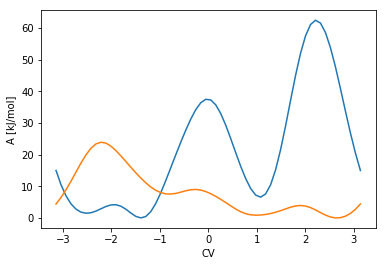

In [8]:
pbmetad.potential_of_mean_force(['phi', 'psi'])

/Users/joshsmith/Git/plumitas_examples/.env/lib/python3.6/site-packages/plumitas/core.py:369: RuntimeWarning: divide by zero encountered in log
  hist = -np.log(hist) / beta


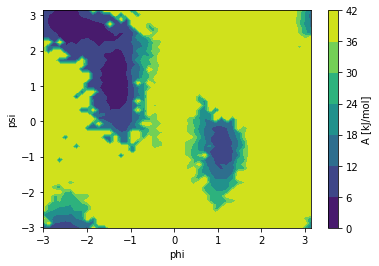

In [10]:
pbmetad.free_energy_surface('phi', 'psi', weight='weight')